In [23]:
%pylab inline
import regain.datasets; reload(regain.datasets)
from regain.datasets import generate
from regain.plot import plot_graph_with_latent_variables
from sklearn.datasets import make_sparse_spd_matrix
import networkx as nx

Populating the interactive namespace from numpy and matplotlib


In [28]:
thetas = generate(epsilon=5)

In [29]:
thetas

[array([[ 1.43788866, -0.82334849, -1.12094907,  0.21232494,  0.09425023],
        [-0.82334849,  1.52657909,  0.42175833, -0.94643177, -0.12457459],
        [-1.12094907,  0.42175833,  1.3030578 , -0.05970237, -0.02650165],
        [ 0.21232494, -0.94643177, -0.05970237,  1.74788495, -1.18990699],
        [ 0.09425023, -0.12457459, -0.02650165, -1.18990699,  1.50063638]]),
 array([[ 2.23606798,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  2.23606798,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  2.23606798,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  2.23606798,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  2.23606798]]),
 array([[ 2.23606798,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  2.23606798,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  2.23606798,  0.        ,  0.        ],
        [ 0.        ,

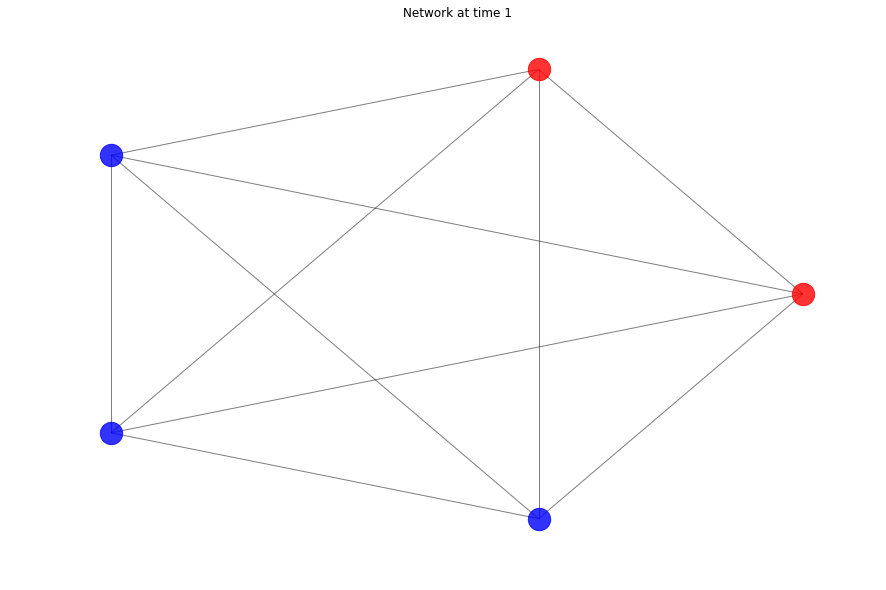

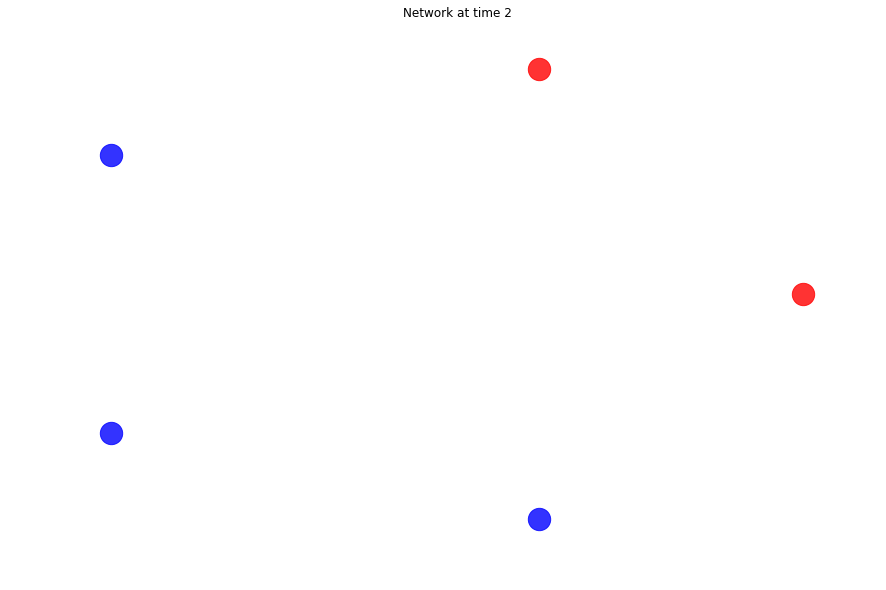

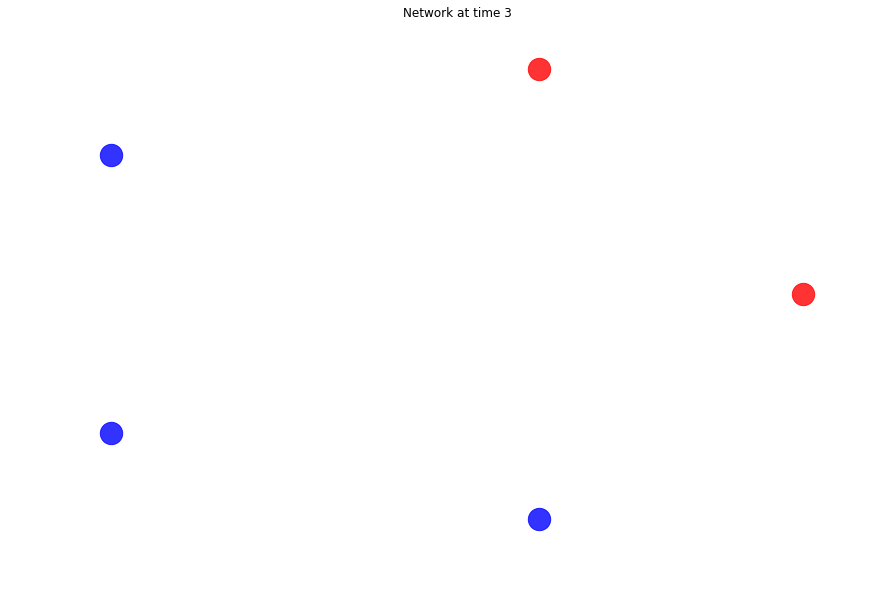

In [30]:
for i, theta in enumerate(thetas):
    plot_graph_with_latent_variables(theta, 2,3, "Network at time "+str(i+1))

In [31]:
sigmas = []
for theta in thetas:
    sigmas.append(np.linalg.inv(theta))

In [32]:
data_list = []
for sigma in sigmas:
    #generate samples from covariance matrix
    data_list.append(np.random.multivariate_normal(np.zeros(sigma.shape[0]), sigma, 50))

In [33]:
from regain.time_graph_lasso_admm import covseltime
Theta, S = covseltime(data_list, lamda=5)

[[ 1.43788866 -0.82334849 -1.12094907  0.21232494  0.09425023]
 [-0.82334849  1.52657909  0.42175833 -0.94643177 -0.12457459]
 [-1.12094907  0.42175833  1.3030578  -0.05970237 -0.02650165]
 [ 0.21232494 -0.94643177 -0.05970237  1.74788495 -1.18990699]
 [ 0.09425023 -0.12457459 -0.02650165 -1.18990699  1.50063638]]
[[ 0.81350455 -0.37280947 -0.54835142  0.02506092  0.05974573]
 [-0.37280947  1.126434    0.10474689 -0.67120187 -0.19453342]
 [-0.54835142  0.10474689  0.83013381  0.01526534  0.017292  ]
 [ 0.02506092 -0.67120187  0.01526534  1.27509862 -0.84421107]
 [ 0.05974573 -0.19453342  0.017292   -0.84421107  1.17298175]]


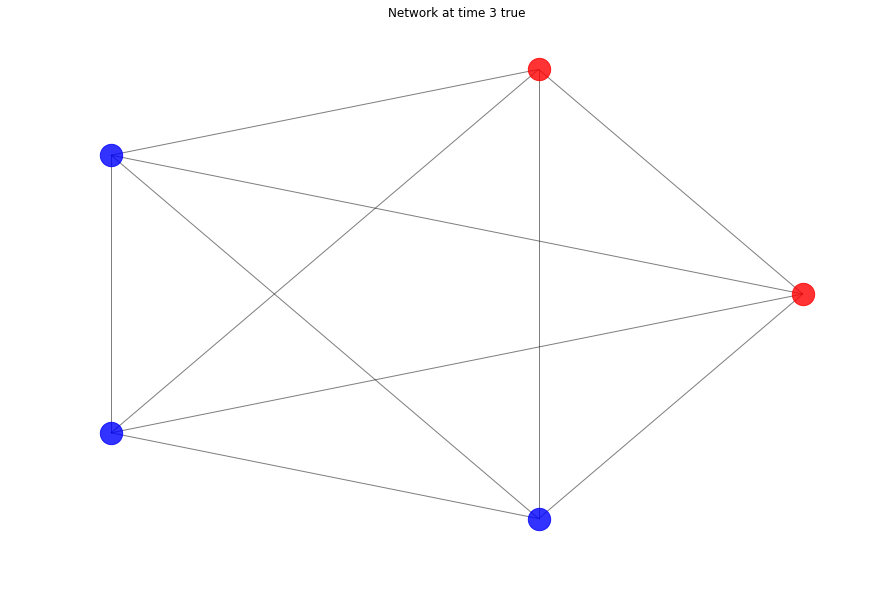

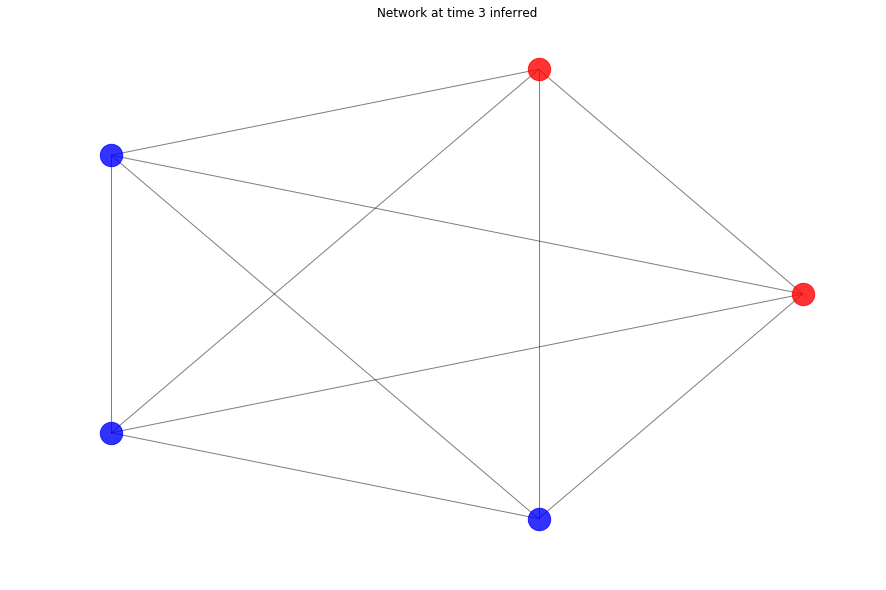

[[ 2.23606798  0.          0.          0.          0.        ]
 [ 0.          2.23606798  0.          0.          0.        ]
 [ 0.          0.          2.23606798  0.          0.        ]
 [ 0.          0.          0.          2.23606798  0.        ]
 [ 0.          0.          0.          0.          2.23606798]]
[[  1.42918444e+00   1.92217562e-02   4.45229117e-02  -3.06395221e-02
   -2.78445512e-02]
 [  1.92217562e-02   1.65704291e+00   2.85277709e-03  -7.94129881e-04
    4.35691891e-02]
 [  4.45229117e-02   2.85277709e-03   1.31490906e+00  -3.28480272e-03
    6.36919084e-02]
 [ -3.06395221e-02  -7.94129881e-04  -3.28480272e-03   1.67877543e+00
   -4.46544747e-02]
 [ -2.78445512e-02   4.35691891e-02   6.36919084e-02  -4.46544747e-02
    1.55844796e+00]]


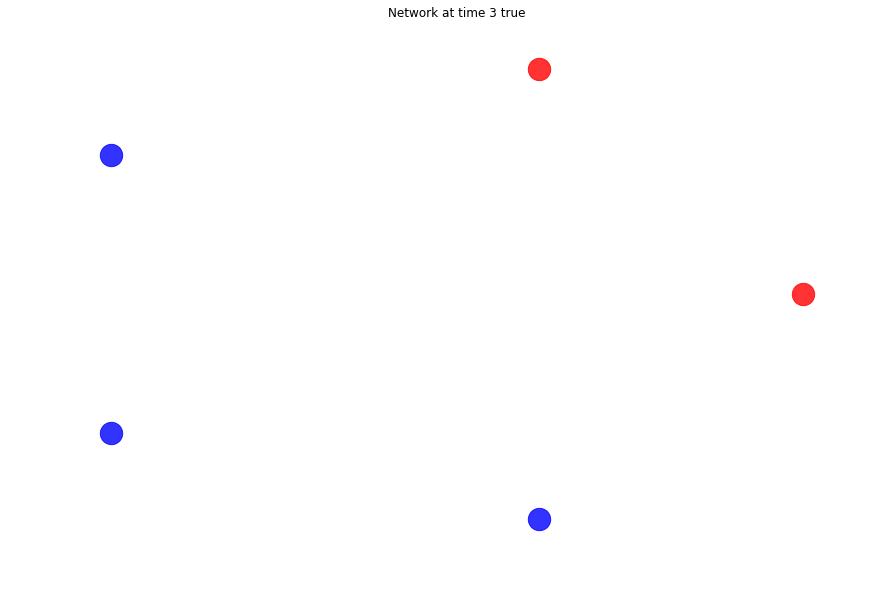

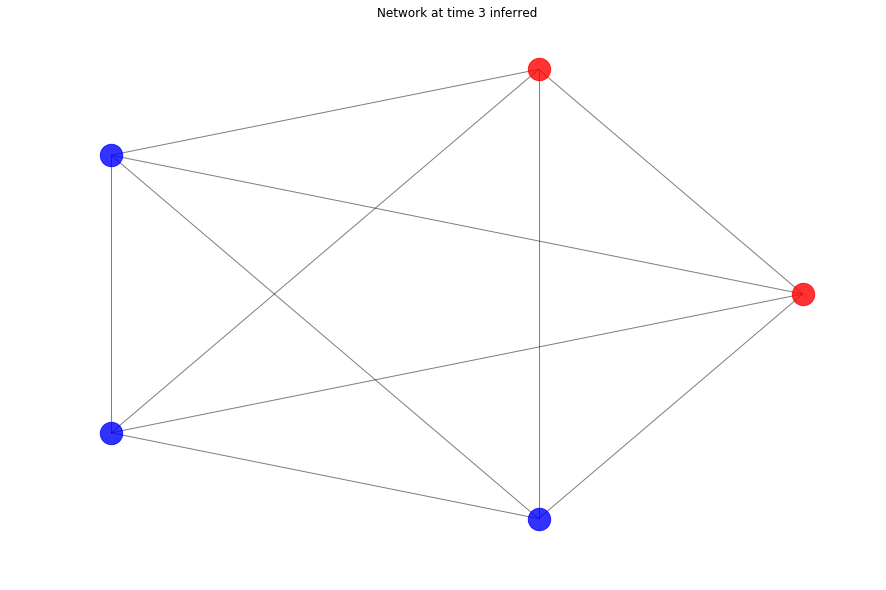

[[ 2.23606798  0.          0.          0.          0.        ]
 [ 0.          2.23606798  0.          0.          0.        ]
 [ 0.          0.          2.23606798  0.          0.        ]
 [ 0.          0.          0.          2.23606798  0.        ]
 [ 0.          0.          0.          0.          2.23606798]]
[[  1.61210024e+00   4.38050671e-03   4.09166242e-03  -4.04770732e-03
    1.33090610e-02]
 [  4.38050671e-03   1.89758967e+00  -1.30635765e-02  -2.22513326e-02
   -1.85822029e-03]
 [  4.09166242e-03  -1.30635765e-02   1.84201252e+00   8.68595714e-03
   -1.50411386e-02]
 [ -4.04770732e-03  -2.22513326e-02   8.68595714e-03   1.85778814e+00
   -4.99428371e-03]
 [  1.33090610e-02  -1.85822029e-03  -1.50411386e-02  -4.99428371e-03
    1.85081301e+00]]


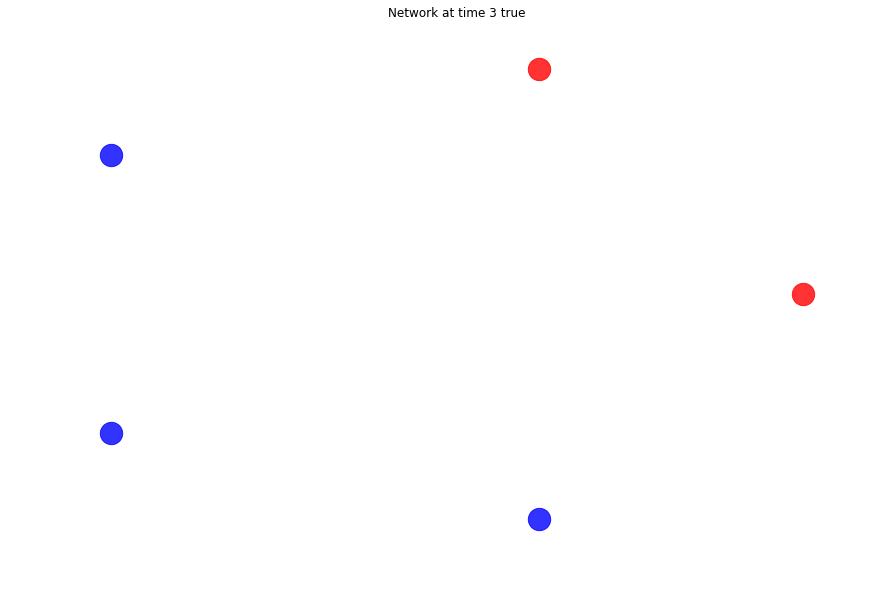

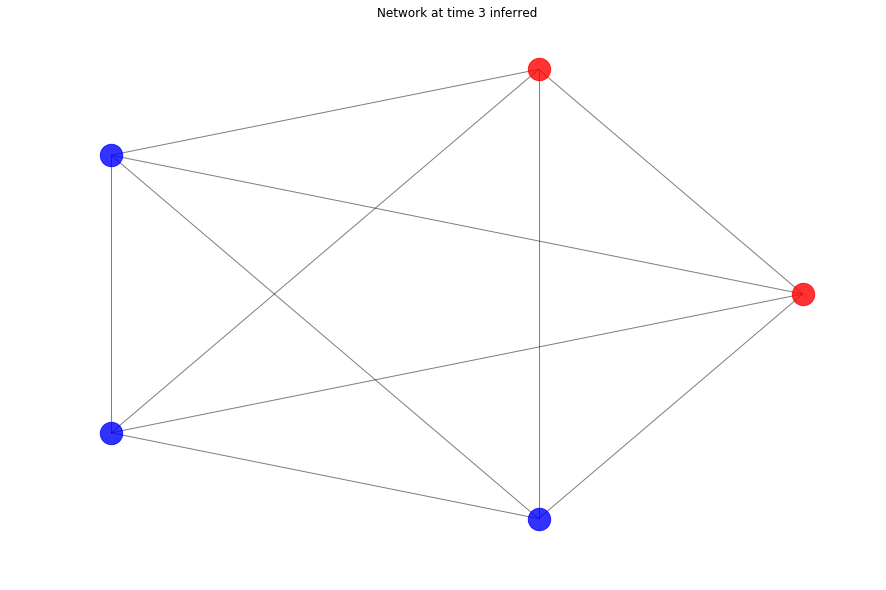

In [34]:
for theta_true, theta_inferred in zip(thetas, Theta):
    print(theta_true)
    print(theta_inferred)
    plot_graph_with_latent_variables(theta_true, 2,3, "Network at time "+str(i+1)+ " true")
    plot_graph_with_latent_variables(theta_inferred, 2,3, "Network at time "+str(i+1)+ " inferred")